In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

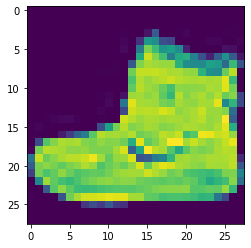

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train, x_test = x_train / 255, x_test / 255

In [ ]:
x_train, x_test = x_train.reshape(60000, 28, 28, 1), x_test.reshape(10000, 28, 28, 1)

# Reshape, neden?

Bu bir convolutional neural network. Keras'larda, Conv2D, 4D array inputu alır. Yani, kısaca, şöyle bir şey yaptık:

```
[[[1, 2]]] -----> [[[ [1], [2] ]]]
```

In [ ]:
model = keras.Sequential([
                          keras.layers.InputLayer(input_shape=(28, 28, 1)),
                          keras.layers.Conv2D(64, (3,3), activation='relu'),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Conv2D(64, (3,3), activation='relu'),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dropout(0.1),
                          keras.layers.Dense(10, activation='softmax')
])

# Input Layer? Bir Dakika, o da nerden çıktı?

Input layer, dense layer'ının ya da flatten layerının içinde shape'i vermekle aynı şey. Sadece, ekstradan bir layer eklemiş oluyoruz. Pek bir farkı yok.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()
# keras.utils.plot_model(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 35s 4ms/step - loss: 0.5254 - accuracy: 0.8081
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3441 - accuracy: 0.8749
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2960 - accuracy: 0.8918
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2670 - accuracy: 0.9012
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2410 - accuracy: 0.9105


## Batch Size?

Batch size, kısacası, yapay zekanın veriyi gruplandırıp tekrar beslemesi. Örneğin 1000 veriyi 100 batch size'da beslersek, 100'lü parçalara bölüp ayrı ayrı eğitilecek. Bu eğitimi hızlandırır.

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2714 - accuracy: 0.9029


[0.2713847756385803, 0.902899980545044]